In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("C:\\Users\\Dell\\Desktop\\Store Sales (Time Series)\\train.csv")
test=pd.read_csv("C:\\Users\\Dell\\Desktop\\Store Sales (Time Series)\\test.csv")
holiday_events=pd.read_csv("C:\\Users\\Dell\\Desktop\\Store Sales (Time Series)\\holidays_events.csv")
oil=pd.read_csv("C:\\Users\\Dell\\Desktop\\Store Sales (Time Series)\\oil.csv")
stores=pd.read_csv("C:\\Users\\Dell\\Desktop\\Store Sales (Time Series)\\stores.csv")
transactions=pd.read_csv("C:\\Users\\Dell\\Desktop\\Store Sales (Time Series)\\transactions.csv")

## Verilerin Analizi

In [3]:
display("Train",train.head(3),train.tail(3),train.shape,train.isnull().sum(),"*"*70)
display("Test",test.head(3),test.tail(3),test.shape,test.isnull().sum(),"*"*70)
display("Holiday Events",holiday_events.head(3),holiday_events.tail(3),holiday_events.shape,holiday_events.isnull().sum(),"*"*70)
display("Oil",oil.head(3),oil.tail(3),oil.shape,oil.isnull().sum(),"*"*70)
display("Stores",stores.head(3),stores.tail(3),stores.shape,stores.isnull().sum(),"*"*70)
display("Transactions",transactions.head(3),transactions.tail(3),transactions.shape,transactions.isnull().sum(),"*"*70)

'Train'

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


,id,date,store_nbr,family,sales,onpromotion
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,3000887,2017-08-15,9,SEAFOOD,16.000,0


(3000888, 6)

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

'**********************************************************************'

'Test'

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2


,id,date,store_nbr,family,onpromotion
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9
28511,3029399,2017-08-31,9,SEAFOOD,0


(28512, 5)

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

'**********************************************************************'

'Holiday Events'

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False


,date,type,locale,locale_name,description,transferred
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False
349,2017-12-26,Additional,National,Ecuador,Navidad+1,False


(350, 6)

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

'**********************************************************************'

'Oil'

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97


,date,dcoilwtico
1215,2017-08-29,46.46
1216,2017-08-30,45.96
1217,2017-08-31,47.26


(1218, 2)

date           0
dcoilwtico    43
dtype: int64

'**********************************************************************'

'Stores'

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8


,store_nbr,city,state,type,cluster
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13
53,54,El Carmen,Manabi,C,3


(54, 5)

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

'**********************************************************************'

'Transactions'

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358


,date,store_nbr,transactions
83485,2017-08-15,52,2255
83486,2017-08-15,53,932
83487,2017-08-15,54,802


(83488, 3)

date            0
store_nbr       0
transactions    0
dtype: int64

'**********************************************************************'

In [4]:
display(train.info(),"*"*70)
display(test.info(),"*"*70)
display(holiday_events.info(),"*"*70)
display(oil.info(),"*"*70)
display(stores.info(),"*"*70)
display(transactions.info(),"*"*70)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


None

'**********************************************************************'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


None

'**********************************************************************'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


None

'**********************************************************************'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


None

'**********************************************************************'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


None

'**********************************************************************'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


None

'**********************************************************************'

In [5]:
train["date"]=pd.to_datetime(train["date"],format="%Y-%m-%d")
test["date"]=pd.to_datetime(test["date"],format="%Y-%m-%d")
holiday_events["date"]=pd.to_datetime(holiday_events["date"],format="%Y-%m-%d")
oil["date"]=pd.to_datetime(oil["date"],format="%Y-%m-%d")
transactions["date"]=pd.to_datetime(transactions["date"],format="%Y-%m-%d")

In [6]:
print("train: ",train["date"].min()," ",train["date"].max(),
      "\ntest: ",test["date"].min()," ",test["date"].max(),
      "\nholiday: ",holiday_events["date"].min()," ",holiday_events["date"].max(),
      "\noil: ",oil["date"].min()," ",oil["date"].max(),
      "\ntransactions: ",transactions["date"].min()," ",transactions["date"].max())

train:  2013-01-01 00:00:00   2017-08-15 00:00:00 
test:  2017-08-16 00:00:00   2017-08-31 00:00:00 
holiday:  2012-03-02 00:00:00   2017-12-26 00:00:00 
oil:  2013-01-01 00:00:00   2017-08-31 00:00:00 
transactions:  2013-01-01 00:00:00   2017-08-15 00:00:00


### Oil verisinin azalizi

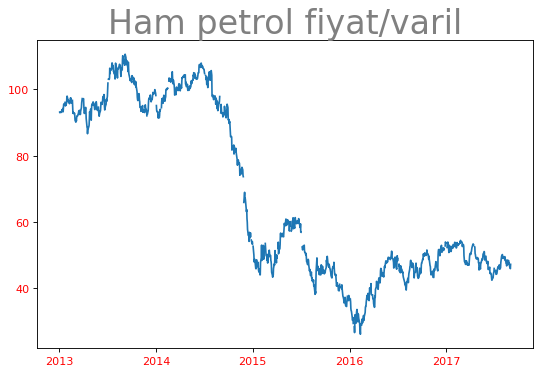

In [7]:
plt.figure(figsize=(8,5), dpi= 80)
plt.plot('date', 'dcoilwtico', data=oil, color='tab:blue')
plt.title('Ham petrol fiyat/varil', fontsize=30, color ='gray' )
plt.xticks(color='red')
plt.yticks(color='red')
plt.show()

In [8]:
oil.dcoilwtico = oil.dcoilwtico.interpolate(method="polynomial", order=2, limit_direction="both")

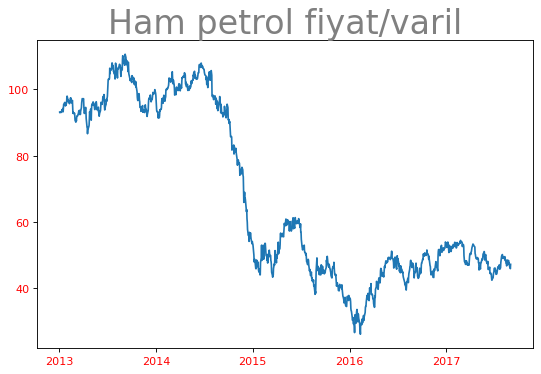

In [9]:
plt.figure(figsize=(8,5), dpi= 80)
plt.plot('date', 'dcoilwtico', data=oil, color='tab:blue')
plt.title('Ham petrol fiyat/varil', fontsize=30, color ='grey' )
plt.xticks(color='red')
plt.yticks(color='red')
plt.show()

In [10]:
oil.isnull().sum()

date          0
dcoilwtico    1
dtype: int64

In [11]:
oil.isnull()    

,date,dcoilwtico
0,False,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1213,False,False
1214,False,False
1215,False,False
1216,False,False


In [12]:
oil.iloc[0:1,1:]=oil.iloc[1:2,1:2]
oil.head()

,date,dcoilwtico
0,2013-01-01,93.14
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [13]:
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

### Holiday verisinin analizi

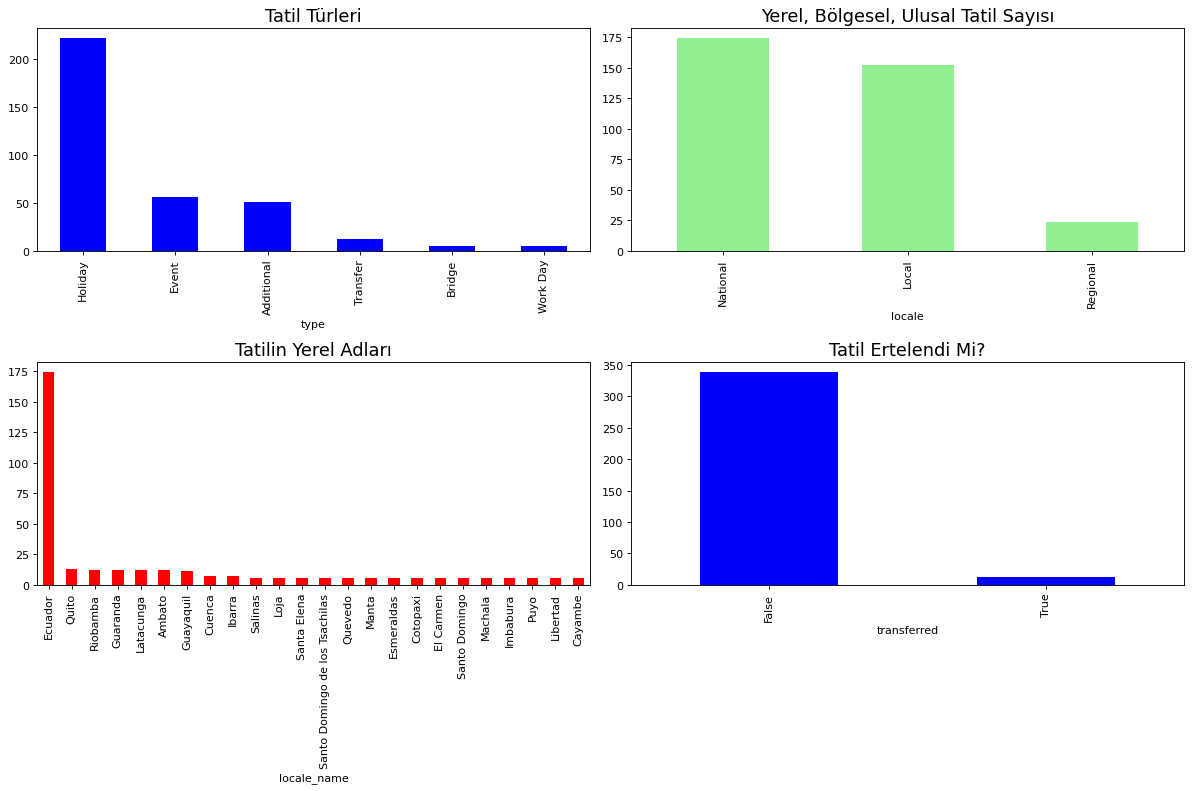

In [14]:
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(2, 2, 1)
holiday_events['type'].value_counts().plot.bar(color='blue')
plt.title('Tatil Türleri',fontsize=16)

plt.subplot(2, 2, 2)
holiday_events['locale'].value_counts().plot.bar(color='lightgreen')
plt.title('Yerel, Bölgesel, Ulusal Tatil Sayısı',fontsize=16)

plt.subplot(2, 2, 3)
holiday_events['locale_name'].value_counts().plot.bar(color='red')
plt.title('Tatilin Yerel Adları',fontsize=16)

plt.subplot(2, 2, 4)
holiday_events['transferred'].value_counts().plot.bar(color='blue')
plt.title('Tatil Ertelendi Mi?',fontsize=16)

plt.tight_layout()
plt.show()

### Store verisinin analizi

In [15]:
stores.head(10)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


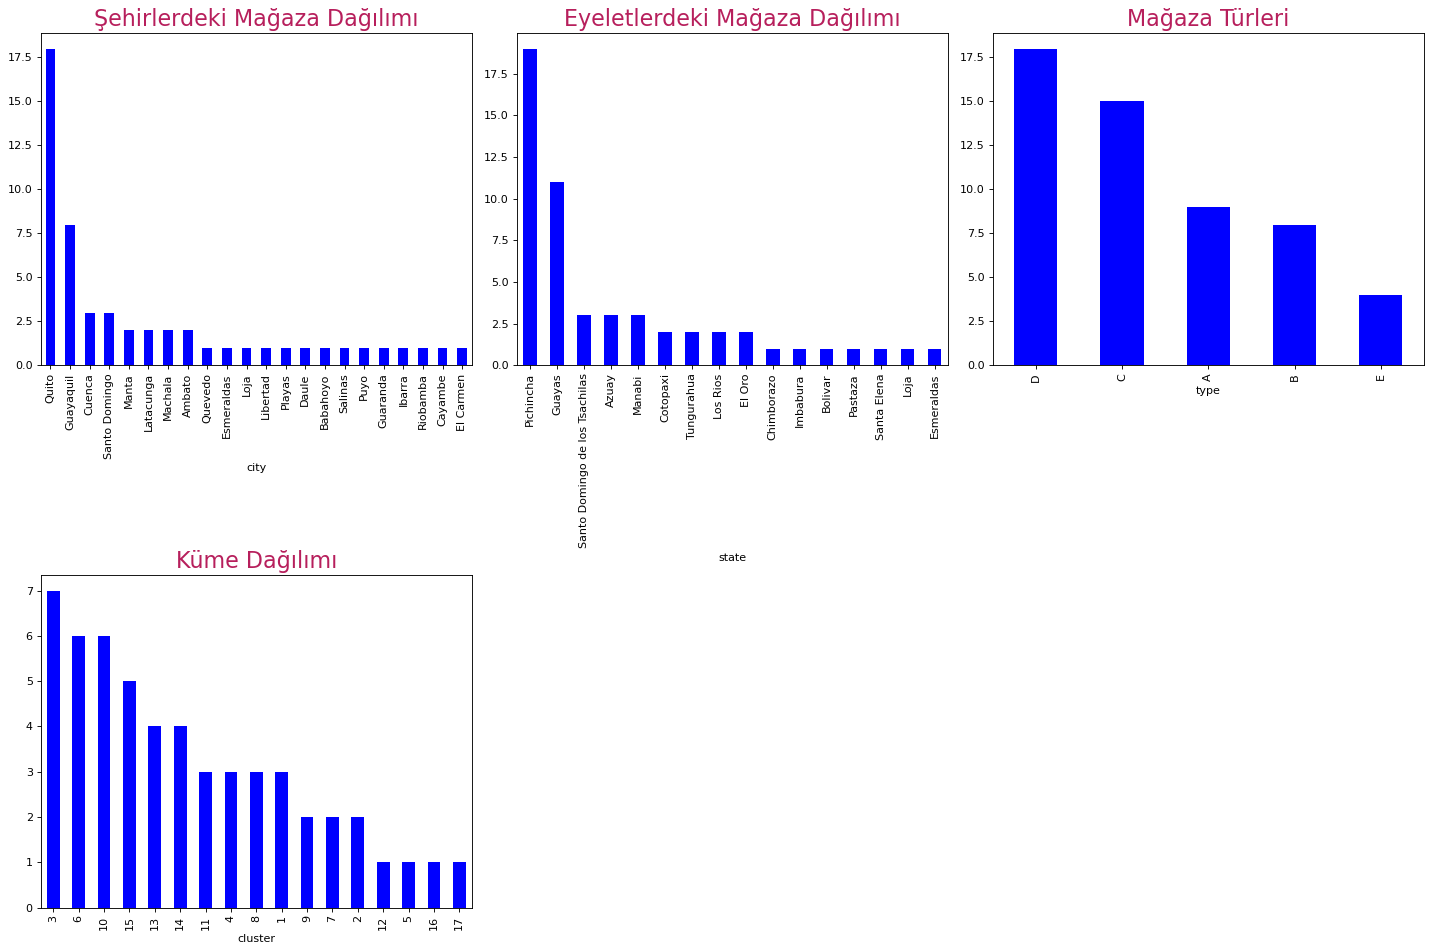

In [16]:
plt.figure(figsize=(18, 12), dpi= 80)

plt.subplot (2, 3, 1)
stores["city"].value_counts().plot.bar(color="blue")
plt.title ("Şehirlerdeki Mağaza Dağılımı", fontsize=20, color='#b71f5c')

plt.subplot (2, 3, 2)
stores["state"].value_counts().plot.bar(color="blue")
plt.title ("Eyeletlerdeki Mağaza Dağılımı", fontsize=20, color='#b71f5c')

plt.subplot (2, 3, 3)
stores["type"].value_counts().plot.bar(color="blue")
plt.title ("Mağaza Türleri", fontsize=20, color='#b71f5c')

plt.subplot (2, 3, 4)
stores["cluster"].value_counts().plot.bar(color="blue")
plt.title ("Küme Dağılımı", fontsize=20, color='#b71f5c')

plt.tight_layout()
plt.show()

### Transactions verisinin analizi

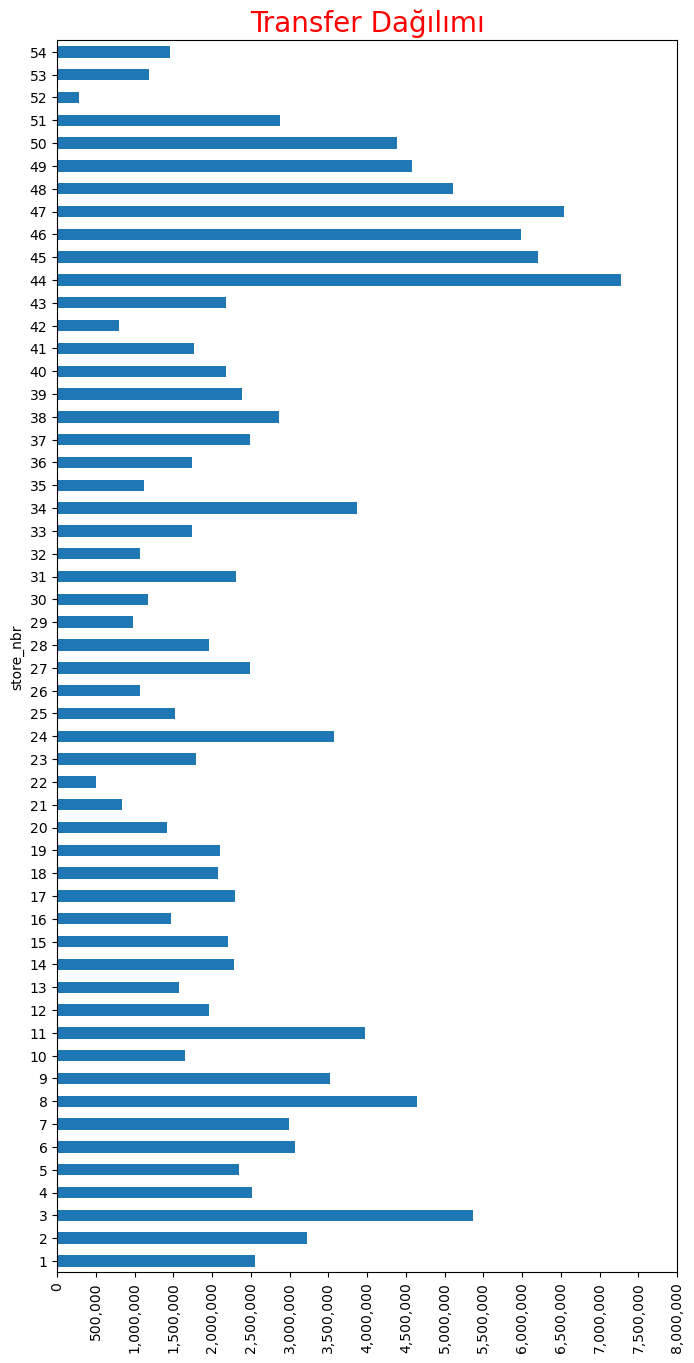

In [17]:
t_groups=transactions.groupby("store_nbr")["transactions"].sum()
fig, ax=plt.subplots(figsize=(8,16),dpi=100)
t_groups.plot.barh()
plt.title("Transfer Dağılımı", fontsize=20, color="red")
xticks=range(0, max(t_groups)+1000000, 500000)
plt.xticks(xticks, [f'{val:,}' for val in xticks], rotation=90)
plt.show()

### Train verisi analizi

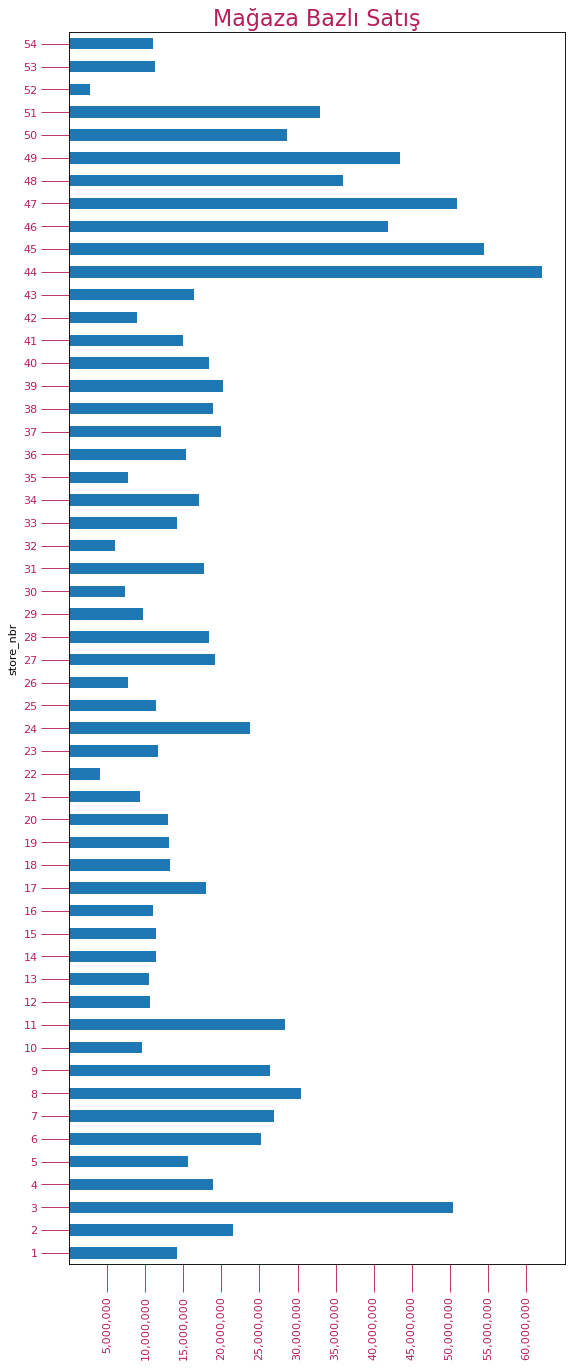

In [18]:
colors = ['#f47e7a', '#b71f5c', '#621237', '#dbbaa7']
font_color = '#525252'
csfont = {'fontname':'Georgia'}
fig, ax = plt.subplots(figsize=(8, 20), dpi= 80)
sales_stores = train.groupby('store_nbr')['sales'].sum()
sales_stores.plot.barh()
plt.title ("Mağaza Bazlı Satış", fontsize=20, color='#b71f5c')
xticks = range(5000000, 60000001, 5000000)
plt.xticks(xticks, [f'{val:,}' for val in xticks], rotation=90)
ax.tick_params(axis='x', colors='#b71f5c', size=25)
ax.tick_params(axis='y', colors='#b71f5c', size=25)
plt.show()

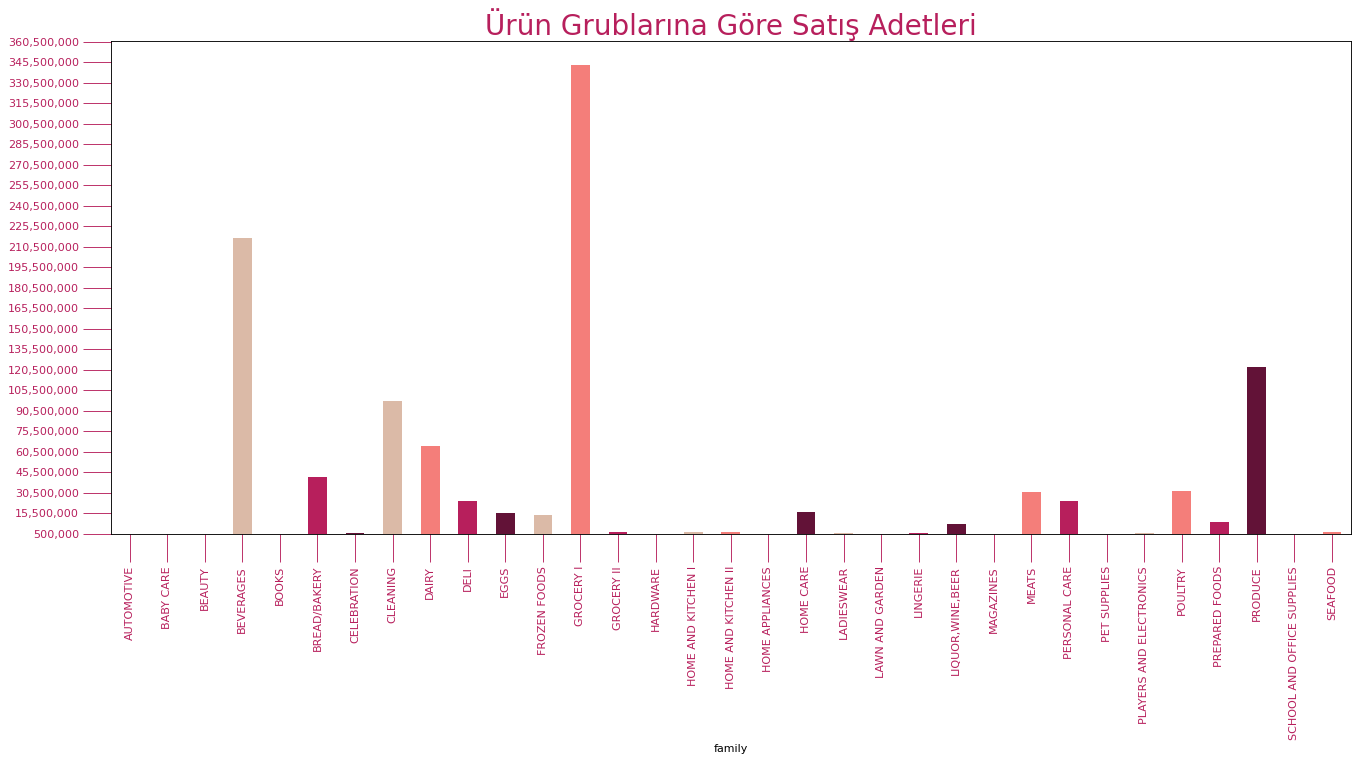

In [19]:
fig, ax = plt.subplots(figsize=(20, 8), dpi= 80)
sales_type_y = train.groupby(['family'])['sales'].sum()
sales_type_y.plot.bar(color=colors)
plt.title ("Ürün Grublarına Göre Satış Adetleri", fontsize=25, color='#b71f5c')
yticks = range(500000, 370000001, 15000000)
plt.yticks(yticks, [f'{val:,}' for val in yticks])
ax.tick_params(axis='x', colors='#b71f5c', size=25)
ax.tick_params(axis='y', colors='#b71f5c',size=25)
plt.show()

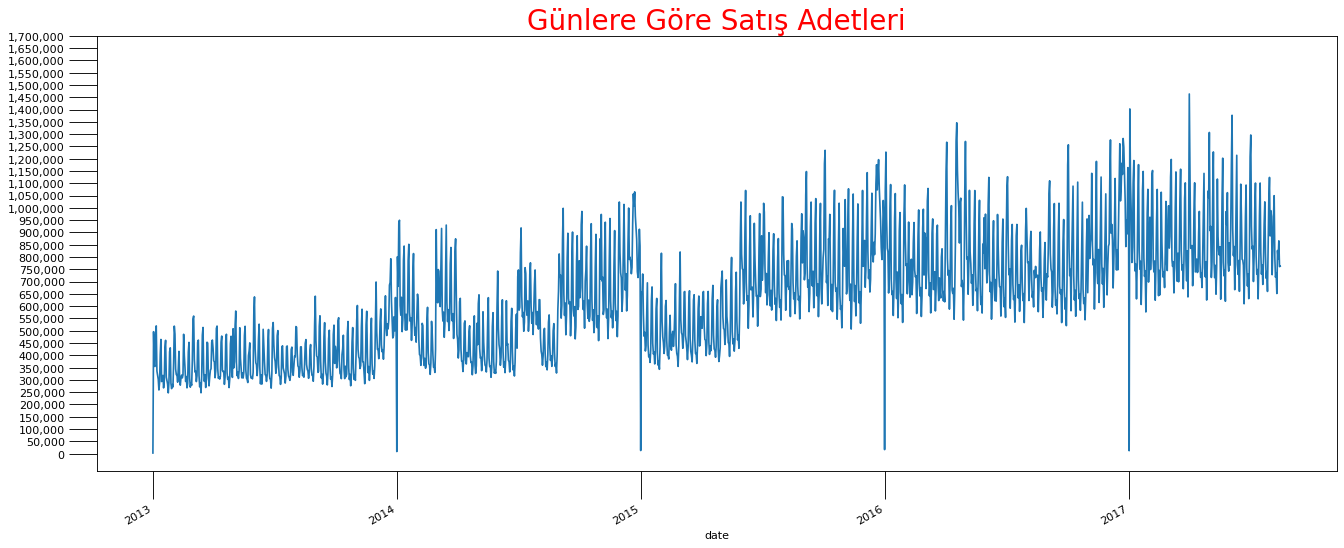

In [20]:
fig, ax = plt.subplots(figsize=(20, 8), dpi= 80)
sales_date = train.groupby(['date'])['sales'].sum()
sales_date.plot()
plt.title ("Günlere Göre Satış Adetleri", fontsize=25, color='red')
yticks = range(0, 1750000, 50000)
plt.yticks(yticks, [f'{val:,}' for val in yticks])
ax.tick_params(axis='x', size=25)
ax.tick_params(axis='y', size=25)
plt.show()

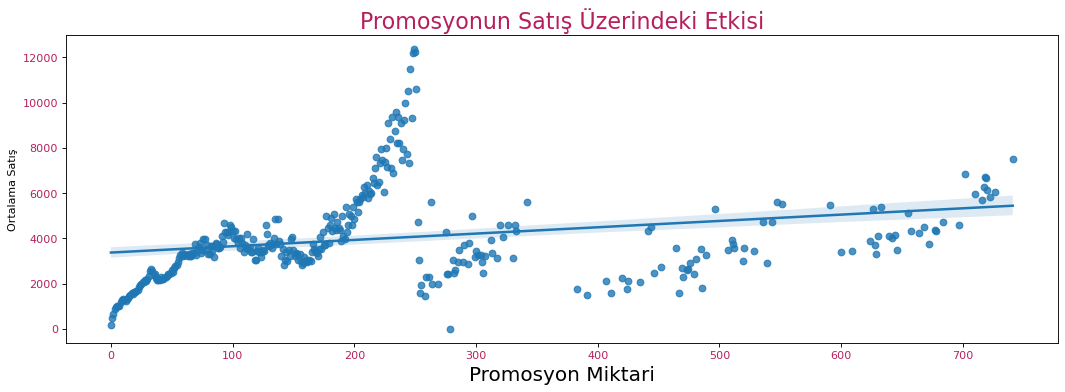

In [21]:
promote_sales = train.groupby(['onpromotion'], as_index=False)['sales'].mean()
plt.figure(figsize=(16, 5), dpi=80)
sns.regplot(x=promote_sales.onpromotion, y=promote_sales.sales)
plt.ylabel("Ortalama Satış")
plt.title("Promosyonun Satış Üzerindeki Etkisi", fontsize=20, color='#b71f5c')
plt.xticks(color='#b71f5c', size=10)
plt.yticks(color='#b71f5c', size=10)
plt.xlabel('Promosyon Miktari', fontsize=18)
plt.show()

In [22]:
holiday_events=holiday_events.drop_duplicates(subset=['date'], keep='last')
train=pd.merge(train,holiday_events,how="left",on=["date"])
train=pd.merge(train,stores,how="left",on=["store_nbr"])
train=pd.merge(train,oil,how="left",on=["date"])

In [23]:
train['day'] = train['date'].dt.day_of_week
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year

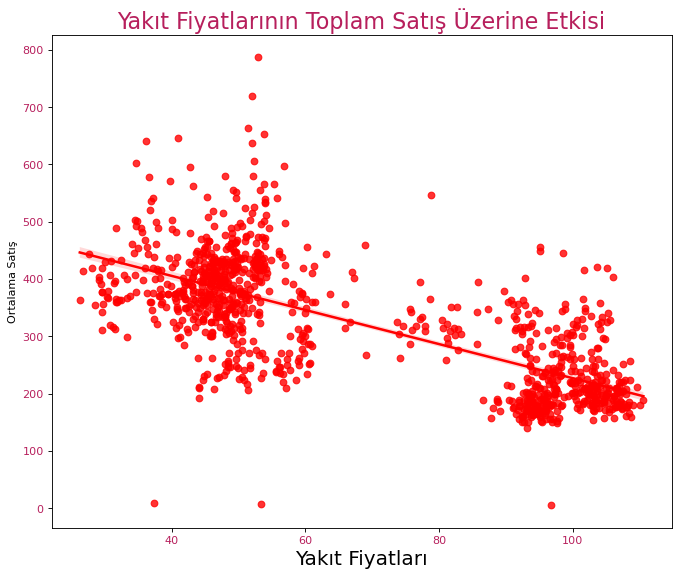

In [24]:
sales_oil = train.groupby(['dcoilwtico'], as_index=False)['sales'].mean()
plt.figure(figsize=(10, 8), dpi=80)
sns.regplot(x=sales_oil.dcoilwtico, y=sales_oil.sales, color='red')
plt.ylabel("Ortalama Satış")
plt.title("Yakıt Fiyatlarının Toplam Satış Üzerine Etkisi", fontsize=20, color='#b71f5c')
#plt.gca().set_facecolor('#283747')
plt.xticks(color='#b71f5c', size=10)
plt.yticks(color='#b71f5c', size=10)
plt.xlabel('Yakıt Fiyatları', fontsize=18)
plt.show()

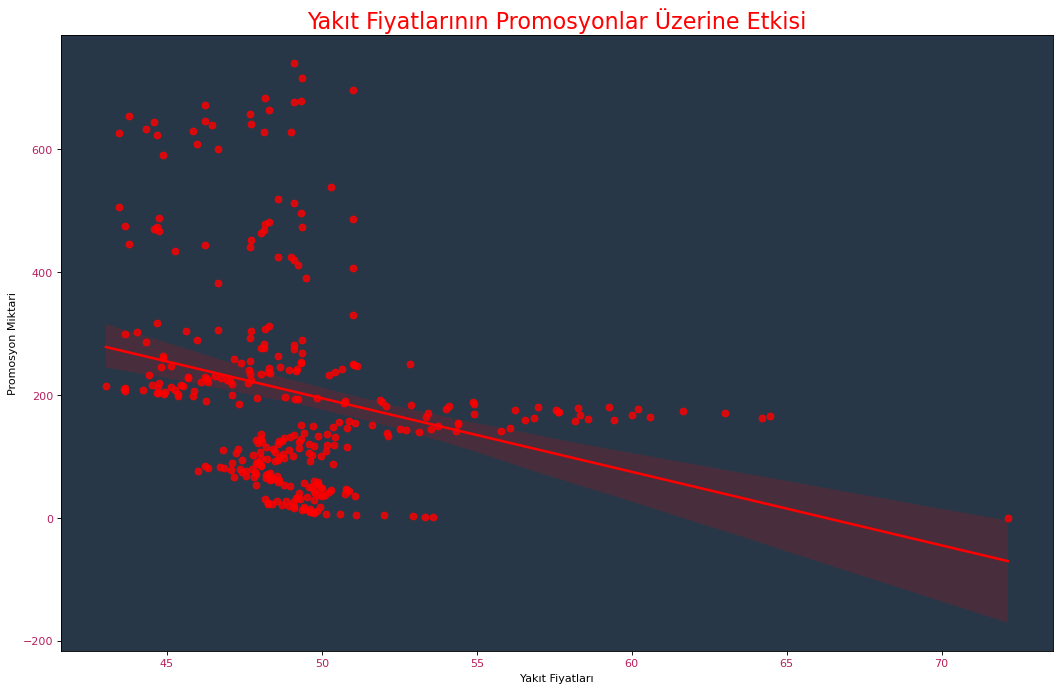

In [25]:
promotion_oil=train.groupby("onpromotion",as_index=False)["dcoilwtico"].mean()
plt.figure(figsize=(16,10), dpi=80)
sns.regplot(x=promotion_oil.dcoilwtico, y=promotion_oil.onpromotion, color="red")
plt.ylabel("Promosyon Miktari")
plt.xlabel("Yakıt Fiyatları")
plt.title("Yakıt Fiyatlarının Promosyonlar Üzerine Etkisi",fontsize=20,color="red")
plt.gca().set_facecolor('#283747')
plt.xticks(color='#b71f5c', size=10)
plt.yticks(color='#b71f5c', size=10)
plt.show()

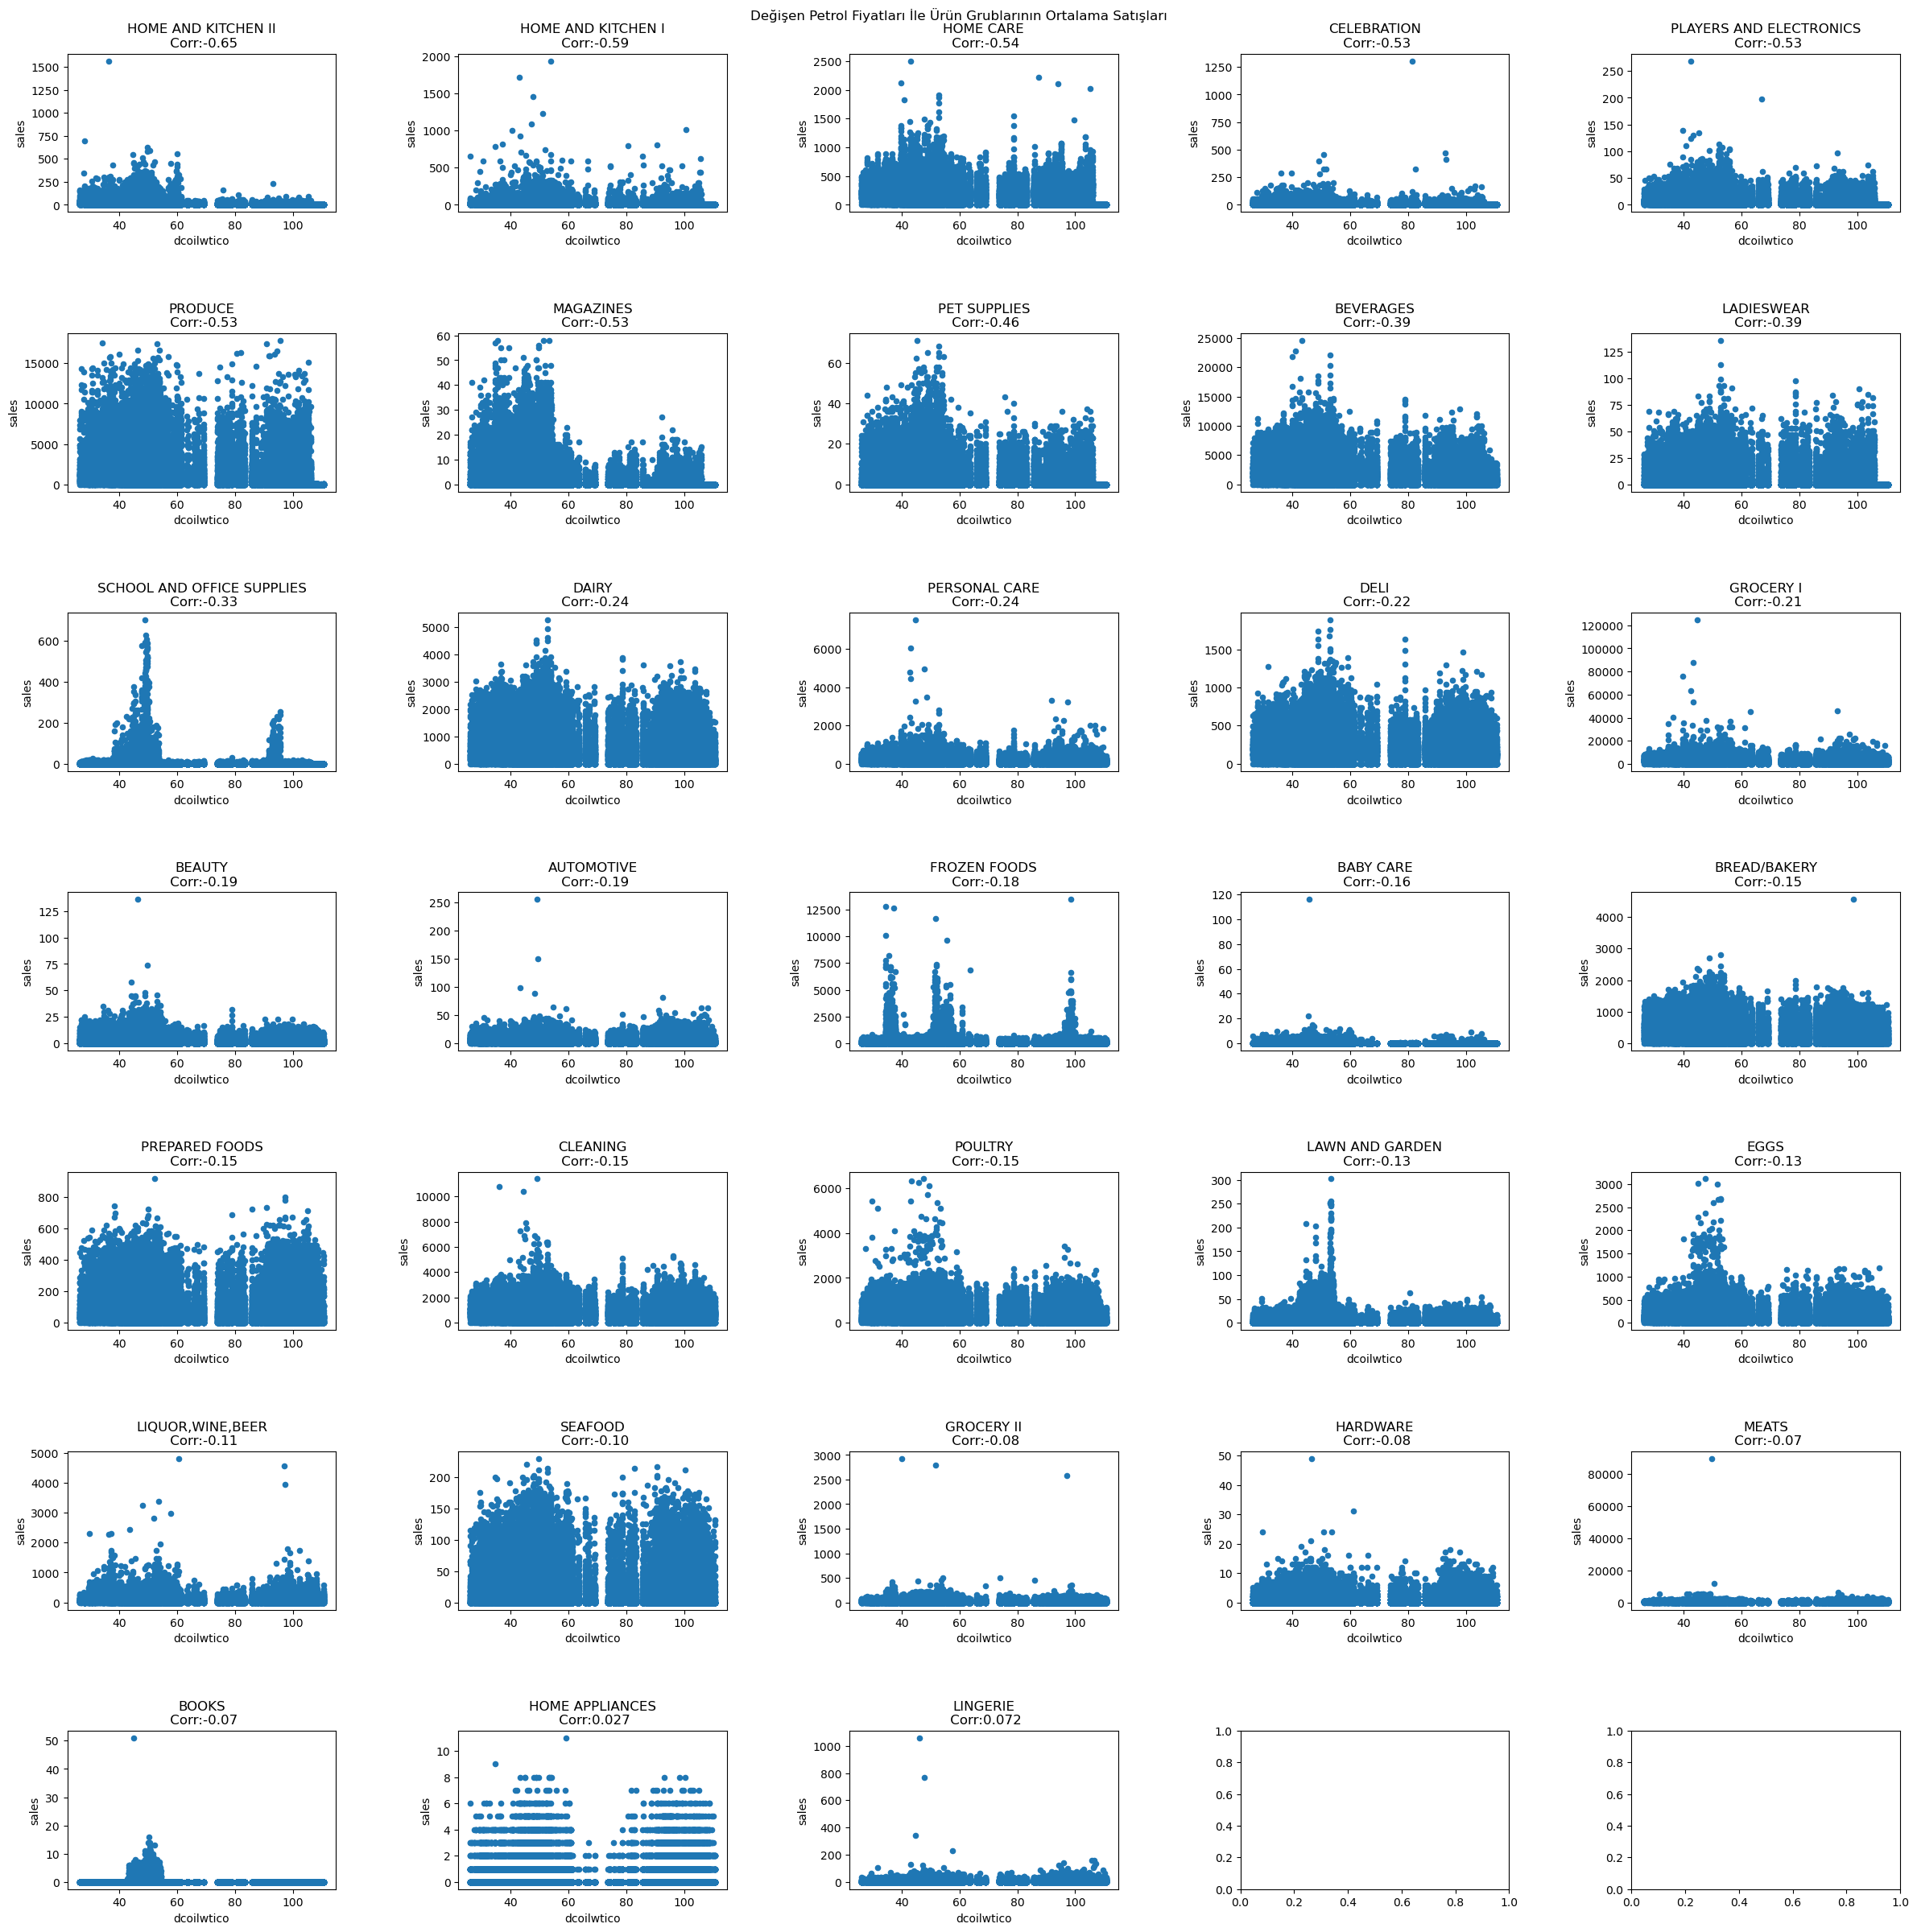

In [26]:
corr_train_oil = train.groupby("family").corr("spearman", numeric_only=True).reset_index()
corr_train_oil = corr_train_oil[corr_train_oil['level_1'] == "dcoilwtico"][["family", "sales"]].sort_values("sales")

fig, axes = plt.subplots(7, 5, figsize=(25, 25))

for i, j in enumerate(corr_train_oil['family']):
    train[train['family'] == j].plot.scatter(x="dcoilwtico", y="sales", ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(j + "\n Corr:" + str(corr_train_oil[corr_train_oil.family == j].sales.iloc[0])[:5])

plt.tight_layout(pad=5)
plt.suptitle("Değişen Petrol Fiyatları İle Ürün Grublarının Ortalama Satışları")

plt.show()

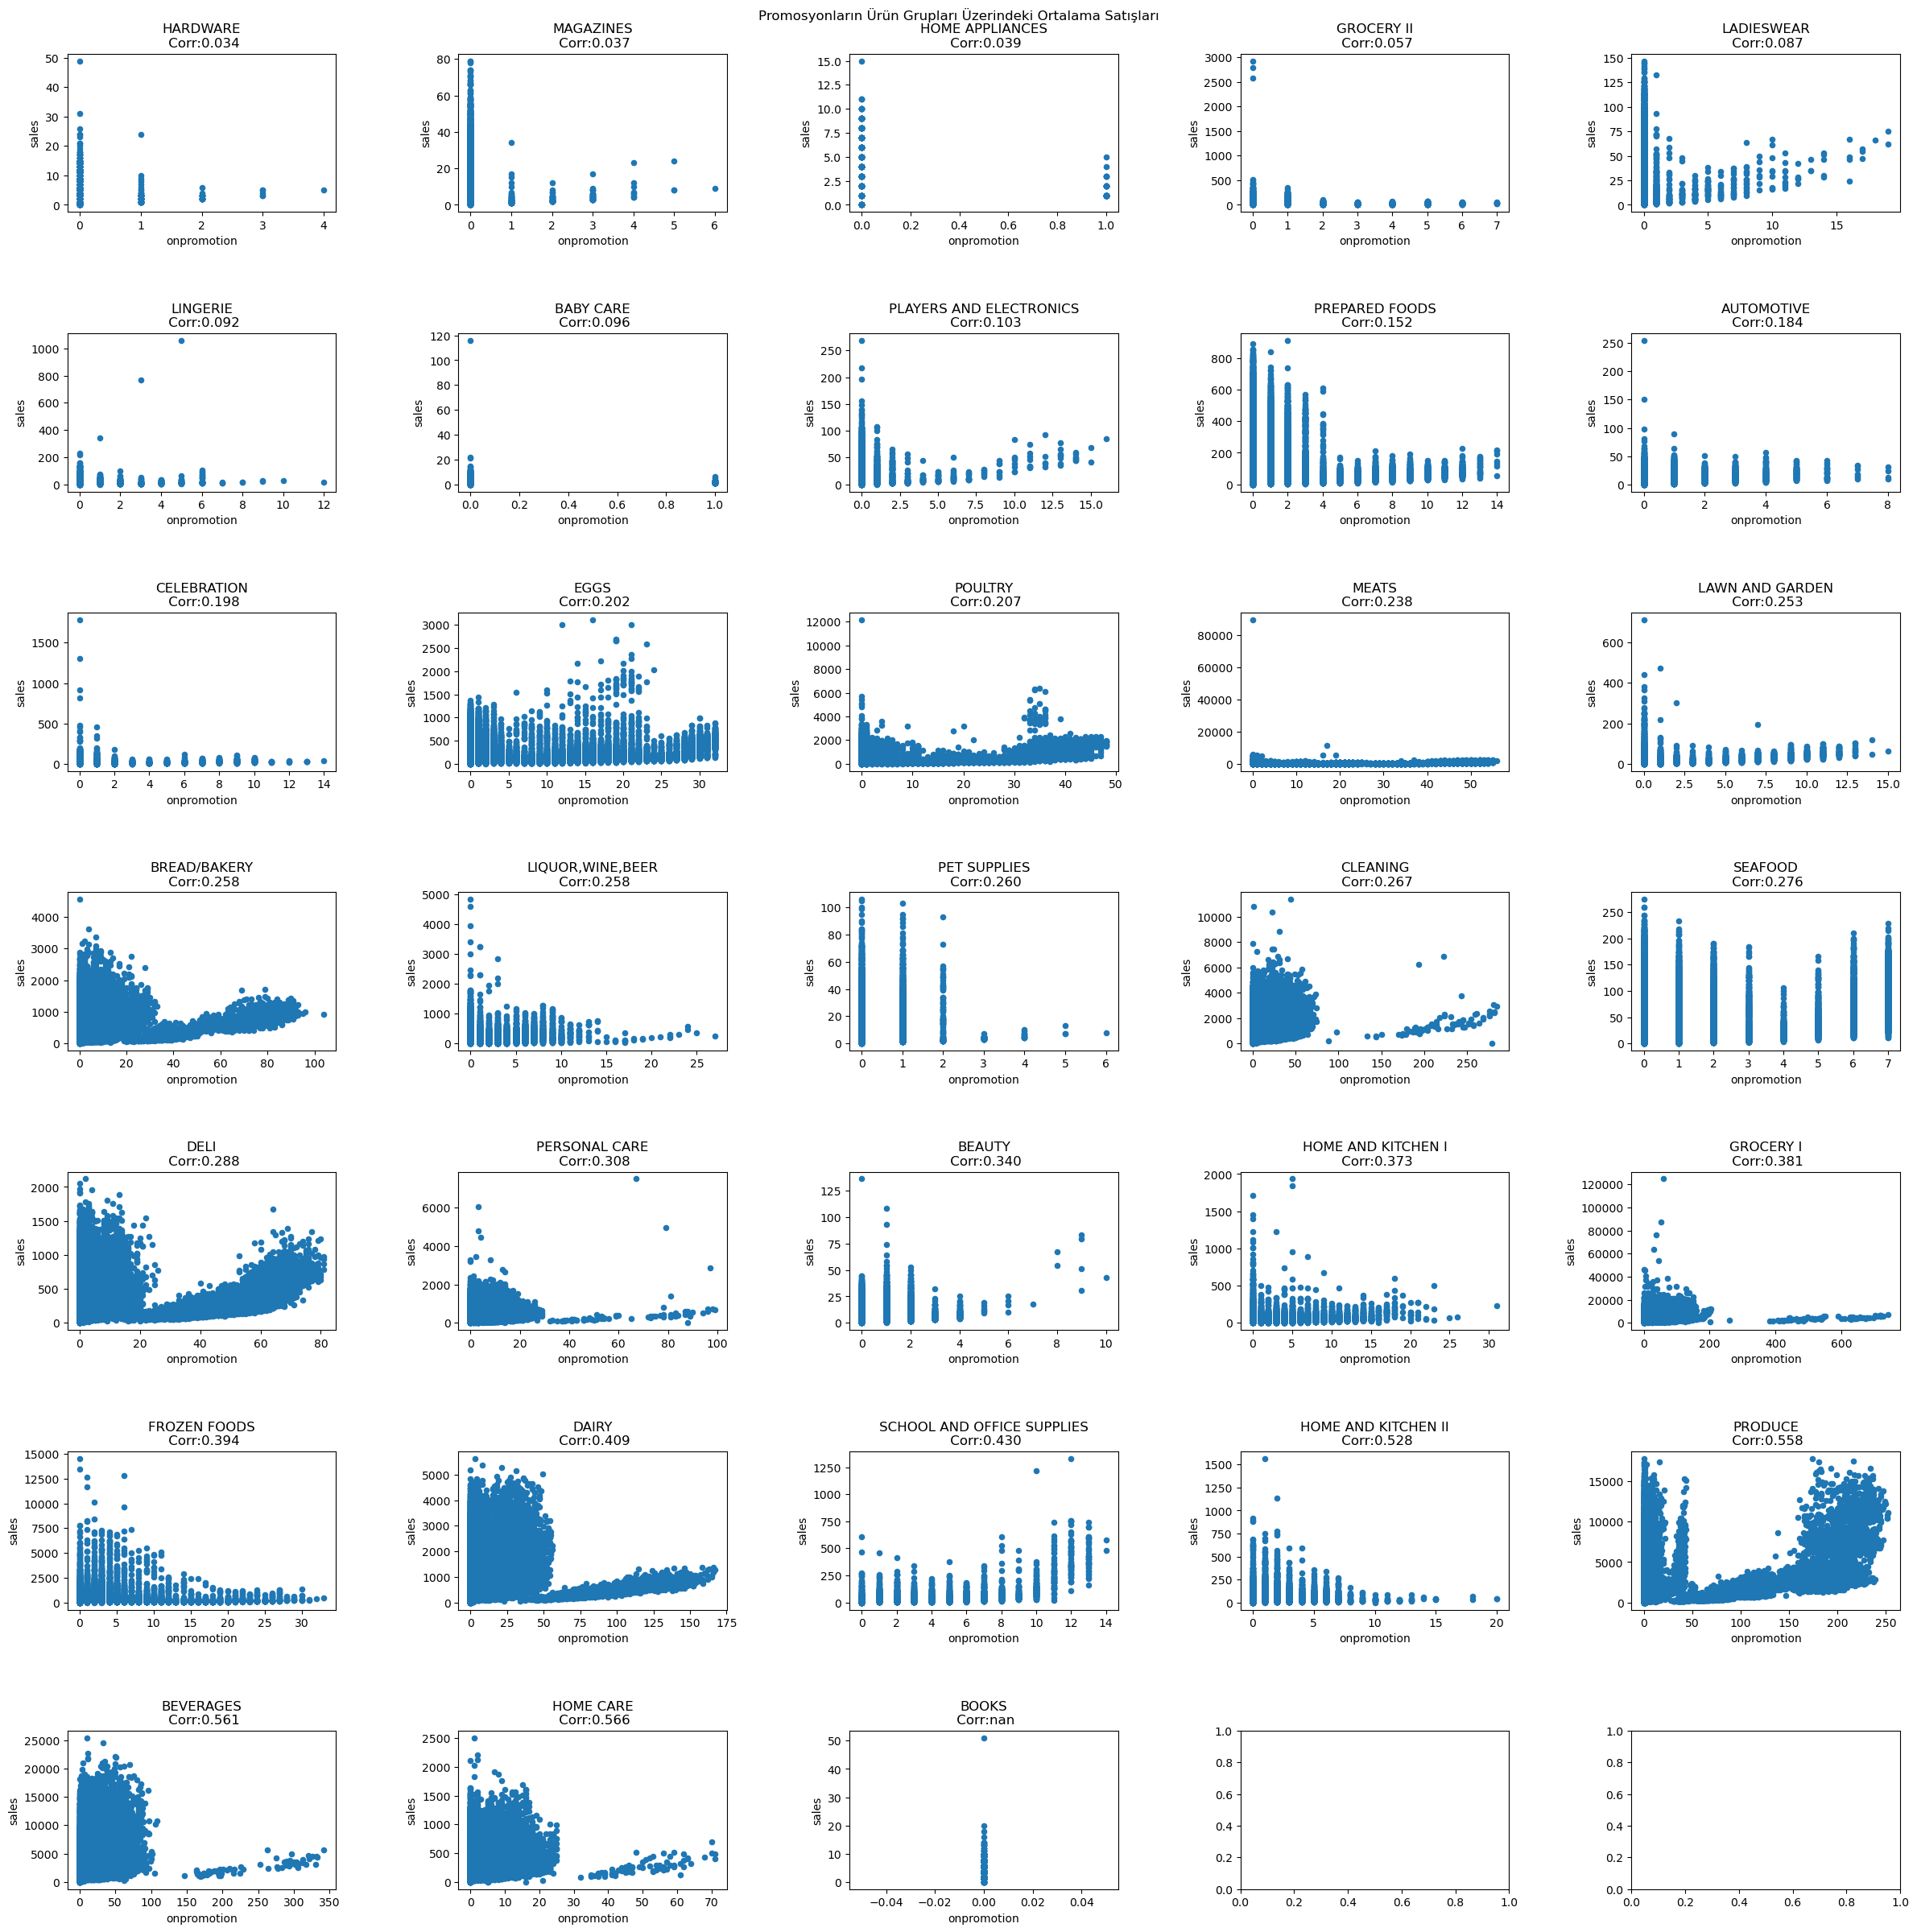

In [27]:
corr_train_promote = train.groupby("family").corr("spearman",numeric_only=True).reset_index()
corr_train_promote = corr_train_promote[corr_train_promote['level_1'] == "onpromotion"][["family", "sales"]].sort_values("sales")

fig, axes = plt.subplots(7, 5, figsize=(25, 25))

for i, j in enumerate(corr_train_promote['family']):
    train[train['family'] == j].plot.scatter(x="onpromotion", y="sales", ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(j + "\n Corr:" + str(corr_train_promote[corr_train_promote.family == j].sales.iloc[0])[:5])

plt.tight_layout(pad=5)
plt.suptitle("Promosyonların Ürün Grupları Üzerindeki Ortalama Satışları")

plt.show()

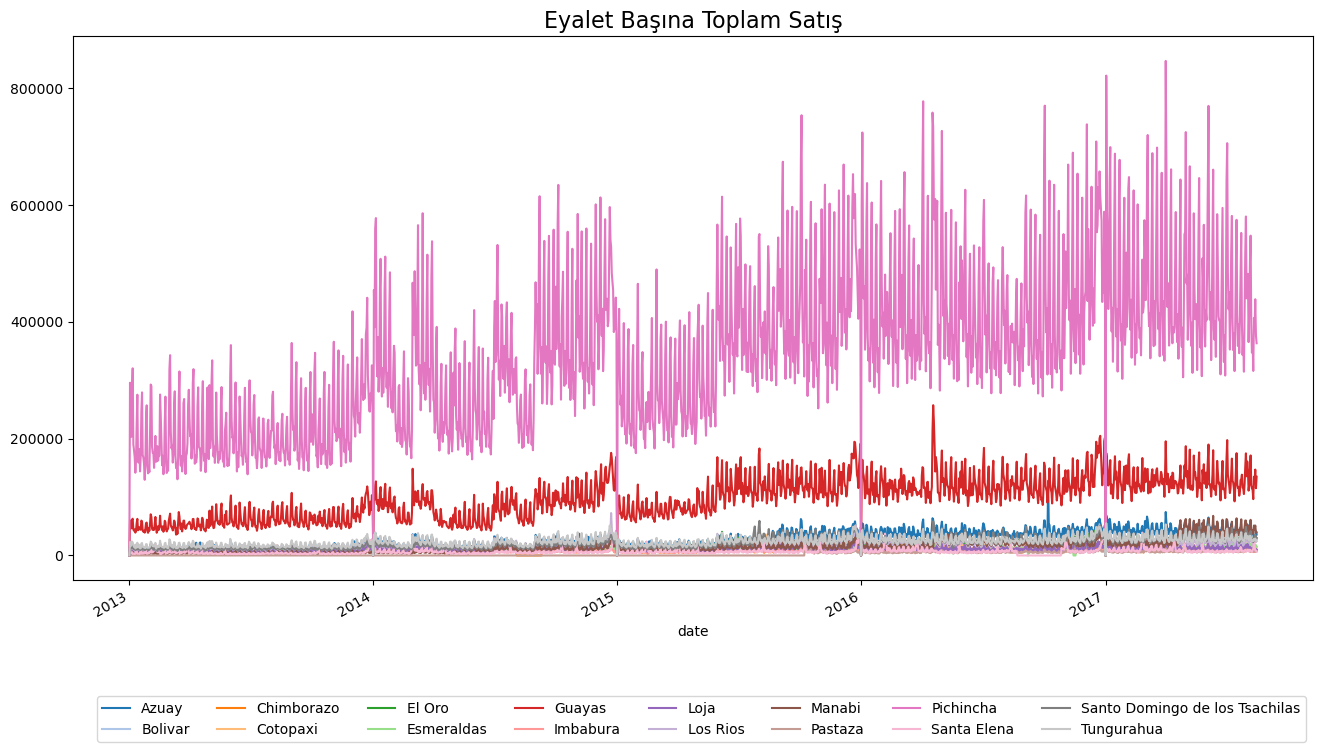

In [28]:
sale_state = train.groupby(['date', 'state'], as_index=False)['sales'].sum()
sale_state = sale_state.pivot(index='date', columns='state', values='sales')
colors = plt.cm.tab20.colors
sale_state.plot(figsize=(16, 8),color=colors)
plt.title("Eyalet Başına Toplam Satış", fontsize=16)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, -.2), ncol=8)
plt.show()

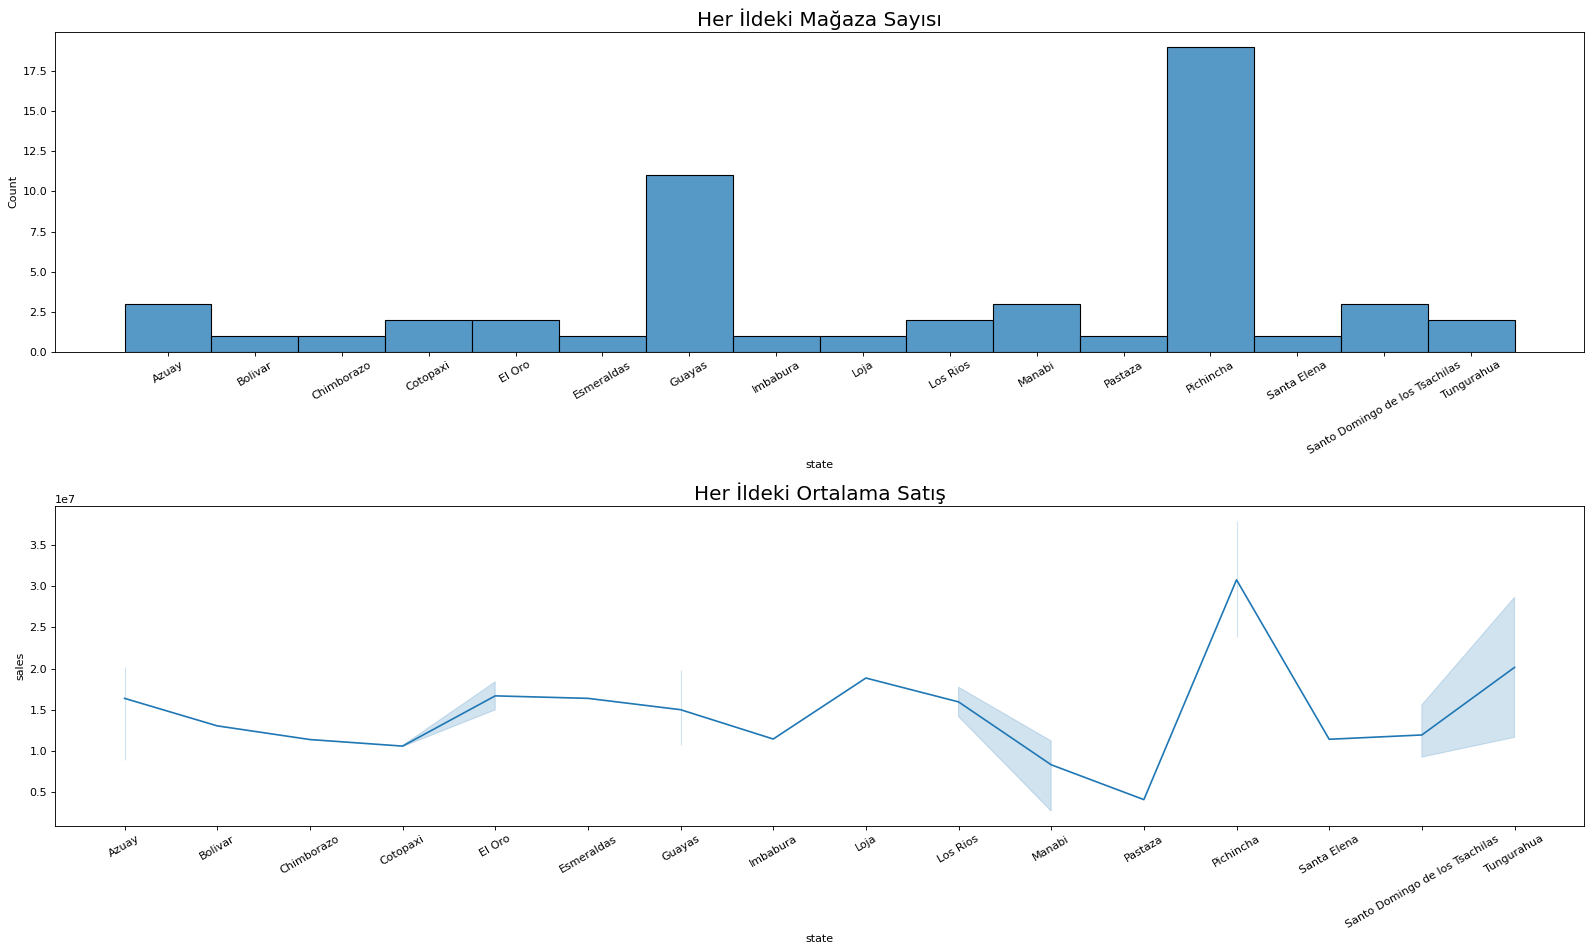

In [29]:
sale_state = train.groupby(['state', 'store_nbr'], as_index=False)['sales'].sum()

plt.figure(figsize=(20, 12), dpi=80)
plt.subplot(2, 1, 1)
sns.histplot(sale_state['state'])
plt.xticks(rotation=30)
plt.title('Her İldeki Mağaza Sayısı', fontsize=18)

plt.subplot(2, 1, 2)
sns.lineplot(x=sale_state['state'], y=sale_state['sales'])
plt.xticks(rotation=30)
plt.title('Her İldeki Ortalama Satış', fontsize=18)
plt.tight_layout()
plt.show()

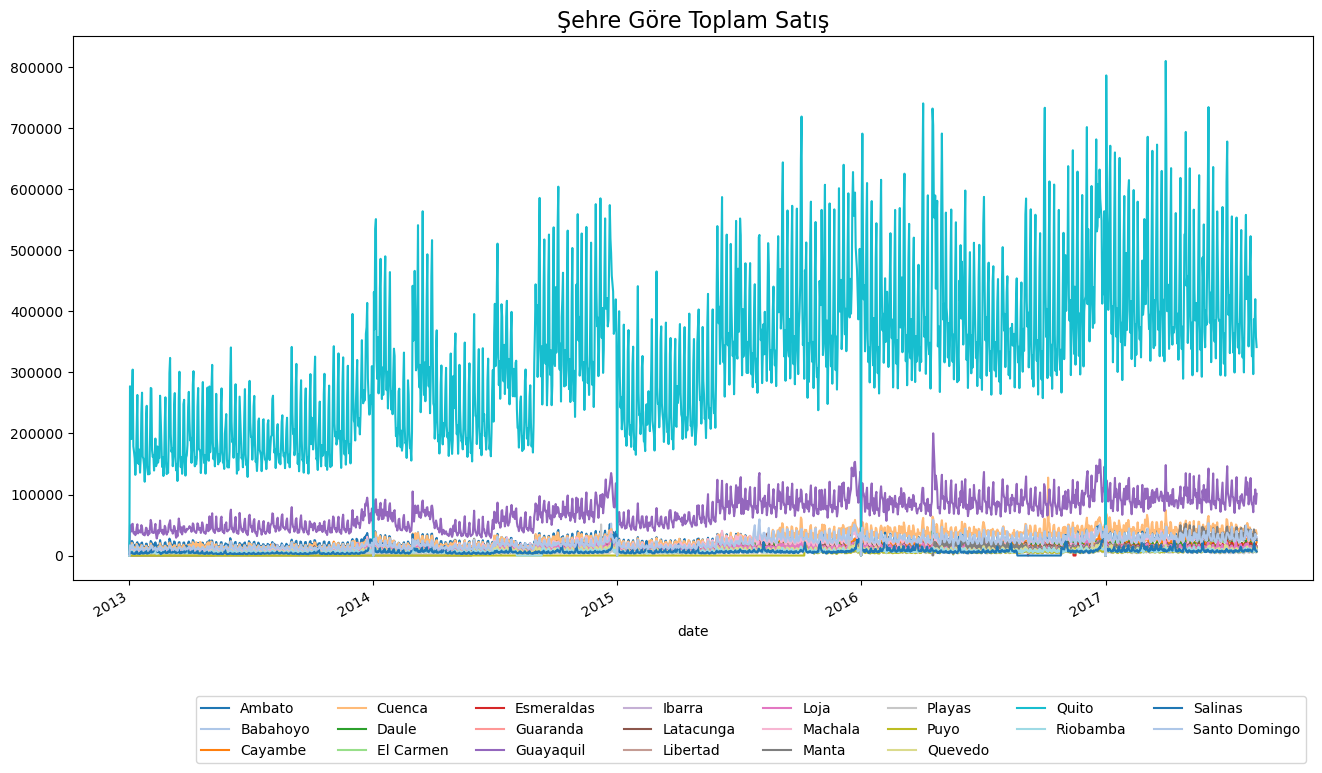

In [30]:
sale_city = train.groupby(['date', 'city'], as_index=False)['sales'].sum()
sale_city = sale_city.pivot(index='date', columns='city', values='sales')
colors = plt.cm.tab20.colors
sale_city.plot(figsize=(16, 8),color=colors)
plt.title("Şehre Göre Toplam Satış", fontsize=16)
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, -.2), ncol=8)
plt.show()

Text(0.5, 1.0, 'Her Şehirdeki Mağaza Sayısı')

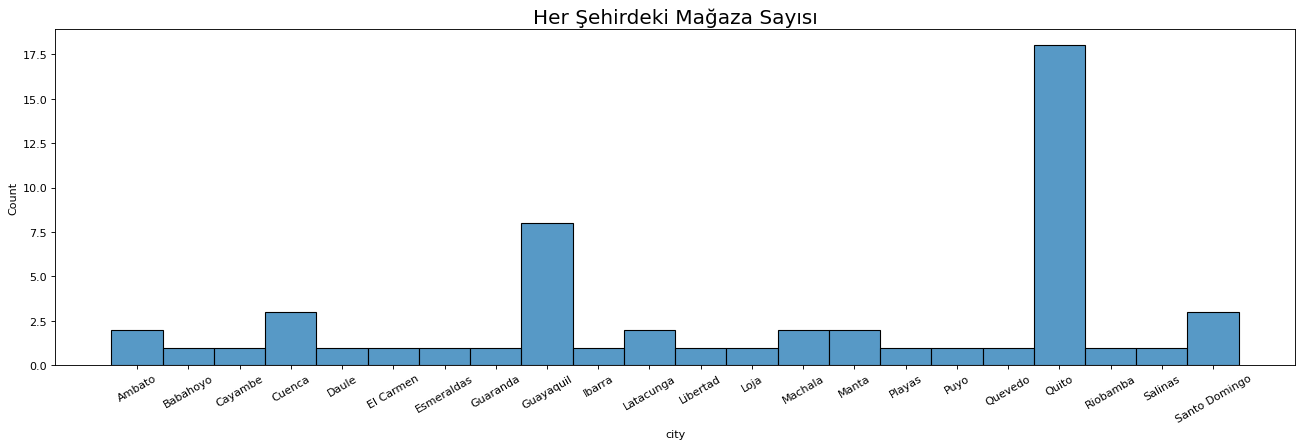

In [31]:
sale_city = train.groupby(['city', 'store_nbr'], as_index=False)['sales'].sum()
plt.figure(figsize=(20, 12), dpi=80)
plt.subplot(2, 1, 1)
sns.histplot(sale_city['city'])
plt.xticks(rotation=30)
plt.title('Her Şehirdeki Mağaza Sayısı', fontsize=18)

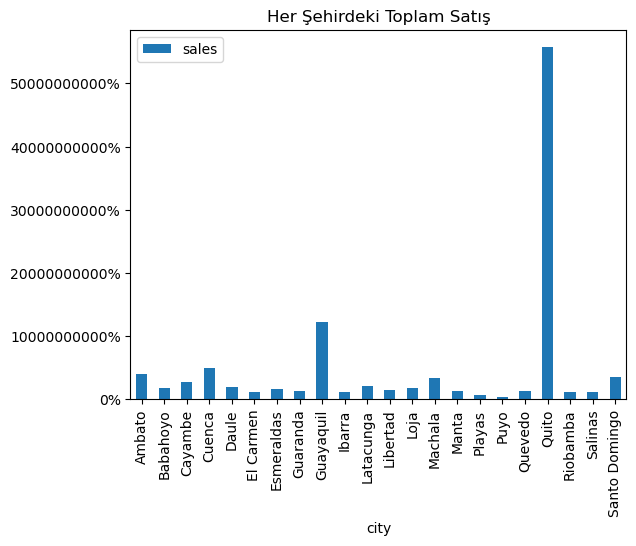

In [32]:
from matplotlib.ticker import PercentFormatter
sale_city = train.groupby(['city', 'store_nbr'], as_index=False)['sales'].sum()
sale_city = sale_city.groupby('city')['sales'].sum().to_frame()
sale_city.plot.bar()
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.title ("Her Şehirdeki Toplam Satış")
plt.show()

In [33]:
city_to_compare =  'Quito'
df = train.copy()

city_data = df[df['city']==city_to_compare]['sales']
other_cities = df[df['city']!=city_to_compare]['sales']

vr1 = print(city_data.var())
vr2 = print(other_cities.var())

from scipy import stats
t_statistic, p_value = stats.ttest_ind(city_data, other_cities, equal_var=False, alternative='greater')

print(f"T-statistic: {t_statistic}\nP-value: {p_value}")
alpha = 0.01
if p_value < alpha:
    print("%99,9 Kesinlikle Alternatif hipotezi kabul ediyoruz. Quito daki ortalama mağaza satışları diğer şehirlerin toplamından daha yüksektir.")
else:
    print("Bu hipotez reddedilir. Quito'daki ortalama mağaza satışlarının daha yüksek olduğuna dair yeterli kanıt yoktur.")

2442015.188611524
570950.2916061812
T-statistic: 180.58980305123487
P-value: 0.0
%99,9 Kesinlikle Alternatif hipotezi kabul ediyoruz. Quito daki ortalama mağaza satışları diğer şehirlerin toplamından daha yüksektir.


# Eğitim ve Test Verisinin Hazırlanması

In [34]:
train.corr(numeric_only=True)

,id,store_nbr,sales,onpromotion,cluster,dcoilwtico,day,month,year
id,1.000000,3.013308e-04,0.085784,0.206260,-4.369436e-05,-8.389138e-01,-1.561462e-03,6.743357e-02,9.776028e-01
store_nbr,0.000301,1.000000e+00,0.041196,0.007286,-5.928399e-02,1.229619e-14,5.272840e-17,-4.946280e-15,8.754910e-15
sales,0.085784,4.119605e-02,1.000000,0.427923,3.852528e-02,-7.888476e-02,3.686897e-02,1.978967e-02,8.109275e-02
onpromotion,0.206260,7.285647e-03,0.427923,1.000000,5.666749e-03,-1.523492e-01,-2.696396e-03,2.588107e-02,1.990601e-01
cluster,-0.000044,-5.928399e-02,0.038525,0.005667,1.000000e+00,-3.586537e-14,-7.375769e-17,3.843254e-15,4.952179e-14
dcoilwtico,-0.838914,1.229619e-14,-0.078885,-0.152349,-3.586537e-14,1.000000e+00,3.637119e-03,7.035660e-03,-8.342069e-01
day,-0.001561,5.272840e-17,0.036869,-0.002696,-7.375769e-17,3.637119e-03,1.000000e+00,-5.607083e-03,-3.993864e-04
month,0.067434,-4.946280e-15,0.019790,0.025881,3.843254e-15,7.035660e-03,-5.607083e-03,1.000000e+00,-1.432929e-01
year,0.977603,8.754910e-15,0.081093,0.199060,4.952179e-14,-8.342069e-01,-3.993864e-04,-1.432929e-01,1.000000e+00


In [35]:
train.describe()

,id,date,store_nbr,sales,onpromotion,cluster,dcoilwtico,day,month,year
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,2.143746e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00,8.481481e+00,6.789904e+01,2.997031e+00,6.207838e+00,2.014838e+03
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,0.000000e+00,1.000000e+00,2.013000e+03
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.640000e+01,1.000000e+00,3.000000e+00,2.014000e+03
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.338000e+01,3.000000e+00,6.000000e+00,2.015000e+03
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00,1.300000e+01,9.580000e+01,5.000000e+00,9.000000e+00,2.016000e+03
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,6.000000e+00,1.200000e+01,2.017000e+03
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01,4.649735e+00,2.566586e+01,2.000740e+00,3.385668e+00,1.345518e+00


In [36]:
train.describe(include=['O'])

,family,type_x,locale,locale_name,description,transferred,city,state,type_y
count,3000888,449064,449064,449064,449064,449064,3000888,3000888,3000888
unique,33,6,3,22,97,2,22,16,5
top,AUTOMOTIVE,Holiday,National,Ecuador,Carnaval,False,Quito,Pichincha,D
freq,90936,263736,249480,249480,17820,433026,1000296,1055868,1000296


In [37]:
train.head(10)

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,dcoilwtico,day,month,year
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
6,6,2013-01-01,1,CELEBRATION,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
7,7,2013-01-01,1,CLEANING,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
8,8,2013-01-01,1,DAIRY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013
9,9,2013-01-01,1,DELI,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13,93.14,1,1,2013


In [38]:
train.drop("transferred",axis=1,inplace=True)
train.drop("date",axis=1,inplace=True)
train.drop("id",axis=1,inplace=True)
train.drop("description",axis=1,inplace=True)
train.drop("type_x",axis=1,inplace=True)
train.drop("locale",axis=1,inplace=True)
train.drop("city",axis=1,inplace=True)
train.drop("state",axis=1,inplace=True)
train.drop("type_y",axis=1,inplace=True)
train.drop("cluster",axis=1,inplace=True)

In [39]:
train.isnull().sum()

store_nbr            0
family               0
sales                0
onpromotion          0
locale_name    2551824
dcoilwtico      857142
day                  0
month                0
year                 0
dtype: int64

In [40]:
train.dcoilwtico = train.dcoilwtico.interpolate(method="polynomial", order=2, limit_direction="both")

In [41]:
train_data=pd.get_dummies(data=train,columns=["store_nbr","family","locale_name"],dtype=int)

In [42]:
train_data.head()

,sales,onpromotion,dcoilwtico,day,month,year,store_nbr_1,store_nbr_2,store_nbr_3,store_nbr_4,...,locale_name_Machala,locale_name_Manta,locale_name_Puyo,locale_name_Quevedo,locale_name_Quito,locale_name_Riobamba,locale_name_Salinas,locale_name_Santa Elena,locale_name_Santo Domingo,locale_name_Santo Domingo de los Tsachilas
0,0.0,0,93.14,1,1,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,93.14,1,1,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,93.14,1,1,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0,93.14,1,1,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0,93.14,1,1,2013,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
y=train_data["sales"]
train_data.drop(["sales"],axis=1,inplace=True)

In [44]:
x_train=train_data.iloc[0:2400355,:].values
y_train=y[0:2400355].values
x_test=train_data.iloc[2400355:,:].values
y_test=y[2400355:].values

In [45]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x_train=mms.fit_transform(x_train)
x_test=mms.transform(x_test)

# Xgboost

In [46]:
import xgboost as xgb
from xgboost import XGBRegressor

xgbr=XGBRegressor(n_estimators=495, random_state=0, learning_rate=0.01)
xgbr.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=495, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [47]:
y_pred=xgbr.predict(x_test)

In [48]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error
print("r2 score: ",r2_score(y_test,y_pred),
      "\nMAE: ",mean_absolute_error(y_test,y_pred),
      "\nMSE: ",mean_squared_error(y_test,y_pred),
      "\nRMSLE: ",mean_squared_log_error(y_test,y_pred,squared=False))

r2 score:  0.8318315362231672 
MAE:  216.26928684870023 
MSE:  311565.2252943518 
RMSLE:  2.0131724221171625


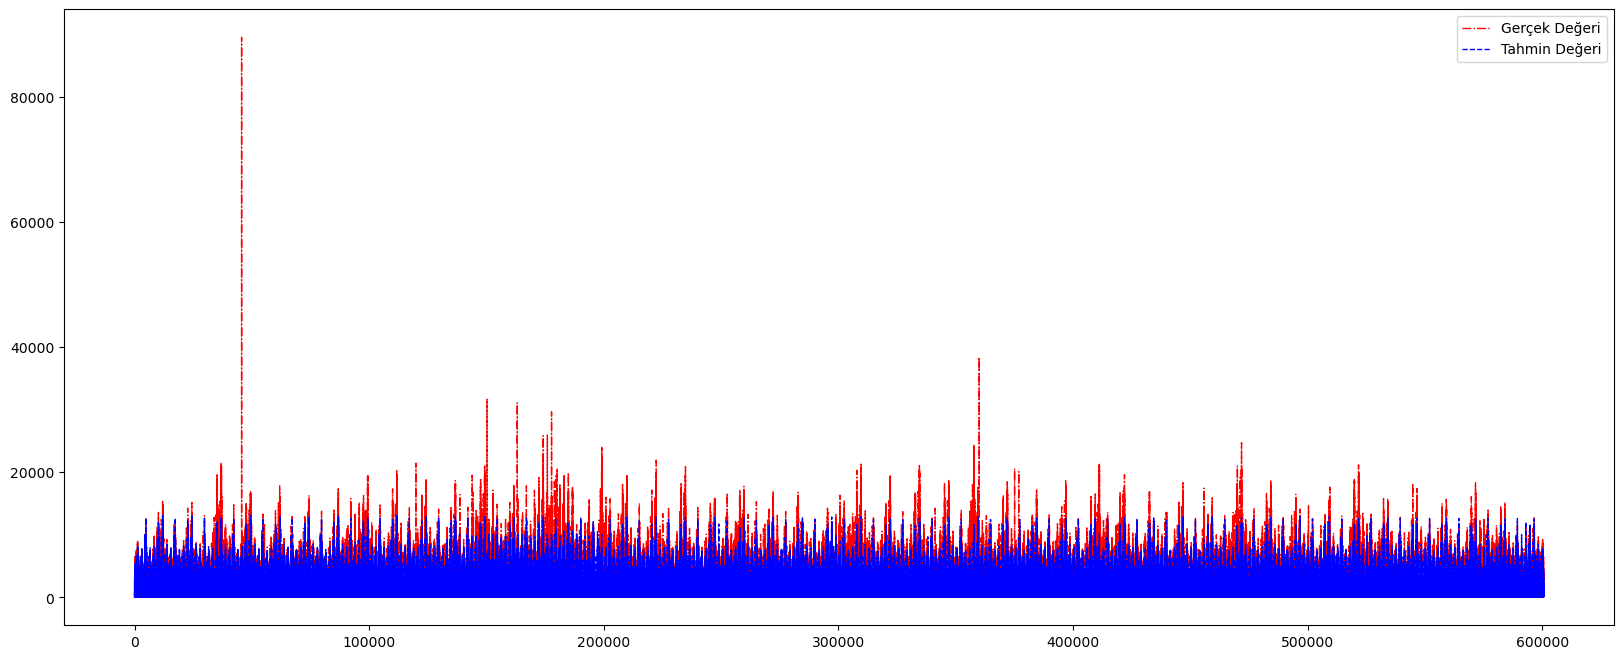

In [49]:
x=np.arange(len(y_test))
fig, ax=plt.subplots(figsize=(20,8),dpi=100)
ax.plot(x,y_test,color="red",linestyle="-.",label="Gerçek Değeri",linewidth=1)
ax.plot(x,y_pred,color="blue",linestyle="--",label="Tahmin Değeri",linewidth=1)
ax.legend()
plt.show()

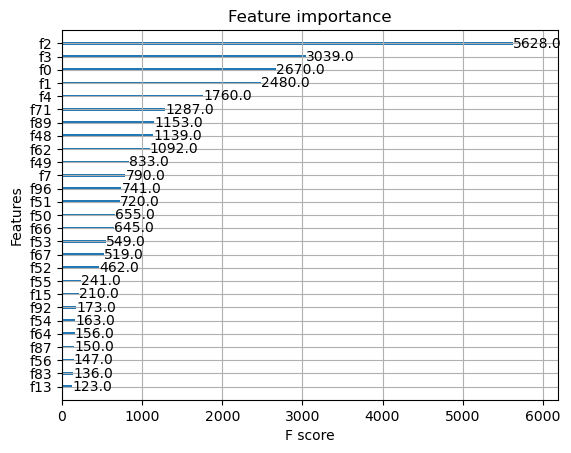

In [50]:
from xgboost import plot_importance
importance=plot_importance(xgbr,max_num_features = 27)

In [51]:
print("İlk Beş Değişken:\nf2 => day\nf3 => month\nf0 => onpromotoin\nf1 => dcoilwtico\nf4 => year")

İlk Beş Değişken:
f2 => day
f3 => month
f0 => onpromotoin
f1 => dcoilwtico
f4 => year
